In [1]:
#I'm not sure I'll need all of these, but I tend to use them.
#So I'll go ahead and import them now.
%matplotlib inline
import pandas as pd
import numpy as np
import pylab as P #I actually don't use pylab very much...
from operator import itemgetter, attrgetter, methodcaller
import matplotlib.pyplot as plt

In [5]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 7A48-729A

 Directory of C:\Users\KLK\Kaggle Codes\Titanic

05/13/2016  02:07 PM    <DIR>          .
05/13/2016  02:07 PM    <DIR>          ..
05/13/2016  11:17 AM    <DIR>          .ipynb_checkpoints
05/12/2016  03:20 PM            28,629 test.csv
05/13/2016  02:07 PM            74,339 Titanic.ipynb
05/12/2016  03:20 PM            61,194 train.csv
               3 File(s)        164,162 bytes
               3 Dir(s)  232,471,363,584 bytes free


In [6]:
#Importing the training data into pandas, which makes nice spreadsheets and is good for mainpulation of rows/columns
SA_train=pd.read_csv('train.csv', header=0)

In [7]:
#Basic information about the columns in the panda object. Could also use SA_train.columns.values, but wouldn't get type info
SA_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
SA_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
SA_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
#So, we see a couple categories missing ages, cabin, embarked, etc. 
#Let's first look at Age:

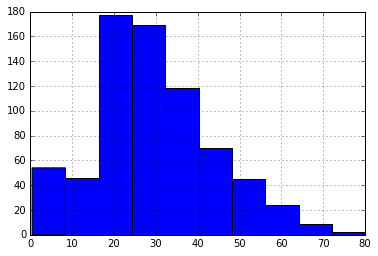

In [11]:
#My favorite way of calling a particular column. Could also do SA_train.Age, 
#But [] method is easier to expand to multiple columns and/or create new columns
SA_train['Age'].hist()

In [8]:
#What's the average age?
SA_train['Age'].mean()

29.69911764705882

In [9]:
#Why don't we fill in the missing ages. But we don't want to corrupt original data, so first make new column
SA_train['Age_Complete']=SA_train['Age'];
SA_train['Age_Complete'].fillna(30,inplace = True);

In [19]:
#Un-comment below to check if it worked
#SA_train.head(10)

In [10]:
#Similiar Problem with Embarked:
pd.value_counts(SA_train['Embarked']) #A nice auto-count of unique terms in a column

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
#S is the most common, so let's make a new column and replace N/A with S:
SA_train['Embarked_Complete']=SA_train['Embarked'];
SA_train['Embarked_Complete'].fillna('S', inplace = True);

In [12]:
#Different way to check:
pd.value_counts(SA_train['Embarked_Complete']) #A nice auto-count of unique terms in a column

S    646
C    168
Q     77
Name: Embarked_Complete, dtype: int64

In [13]:
#Finally, we have the Cabin column: (Un-comment to see)
#pd.value_counts(SA_train['Cabin'])

In [14]:
#It looks pretty useless. If we look at outcomes cut by Cabin not being N/A:
SA_train['Cabin?']=SA_train['Cabin'];
SA_train['Cabin?'].fillna('No', inplace = True);

In [15]:
print( pd.value_counts(SA_train[SA_train['Cabin?']=='No']['Survived']))
print( pd.value_counts(SA_train[SA_train['Cabin?']!='No']['Survived']))

0    481
1    206
Name: Survived, dtype: int64
1    136
0     68
Name: Survived, dtype: int64


In [36]:
#Oh look, turns out having an assigned cabin is very good towards one's health.

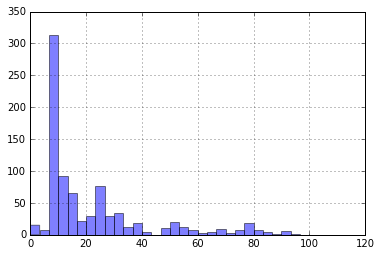

In [16]:
#I'll keep making new columns to cut my data into features. Next up, Fare
SA_train['Fare'].hist(bins=30, range=(0,100), alpha = .5) #There are fares >$100, but few.

In [17]:
#We can also see that the average fare of those that survived is higher than those that did not:
print (SA_train[SA_train['Survived']==1]['Fare'].mean())
print (SA_train[SA_train['Survived']==0]['Fare'].mean())

48.39540760233917
22.117886885245877


In [ ]:
#But how should we bin the fares together? Right now there are so many, we would overfit our data.
#Let's take a look at the survival rate of groups of fares, binned into some smallish grouping (say $5)

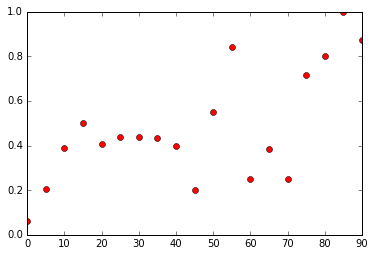

In [18]:
survival_rate=[];
dollar_bins=[];
n=5;
for xx in range(0,20):
    y=0;
    z=0;
    for x in range(0,len(SA_train)):
        if SA_train['Fare'][x]>=n*xx and SA_train['Fare'][x]<n*(xx+1):
            if SA_train['Survived'][x]==1:
                y=y+1
            z=z+1
    try:
        survival_rate.append(y/z);
        dollar_bins.append(n*xx);
    except:
        pass
plt.plot(dollar_bins,survival_rate,'ro')

In [19]:
#So, it looks like we could divide by 10 and 50 if we liked:
test=pd.value_counts(SA_train[SA_train['Fare']<10]['Survived'])
test[1]/(test[0]+test[1])

0.19940476190476192

In [20]:
test=pd.value_counts(SA_train[(SA_train['Fare'] >= 10) & (SA_train['Fare'] < 50)]['Survived'])
test[1]/(test[0]+test[1])

0.42131979695431471

In [21]:
test=pd.value_counts(SA_train[(SA_train['Fare'] >= 50)]['Survived'])
test[1]/(test[0]+test[1])

0.67701863354037262

In [22]:
SA_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Complete',
       'Embarked_Complete', 'Cabin?'], dtype=object)

In [26]:
SA_train['Fare_Reduced']=2;
for x in range(0,len(SA_train)):
    if SA_train.loc[x,'Fare']<10:
        SA_train.loc[x,'Fare_Reduced']=0;
    elif SA_train.loc[x,'Fare']<50:
        SA_train.loc[x,'Fare_Reduced']=1

In [27]:
pd.value_counts(SA_train['Fare_Reduced'])

1    394
0    336
2    161
Name: Fare_Reduced, dtype: int64

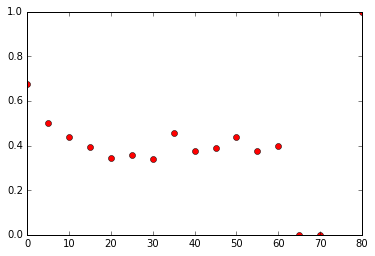

In [29]:
#We need to reduce the ages too:
survival_rate=[];
age_bins=[];
n=5;
for xx in range(0,20):
    y=0;
    z=0;
    for x in range(0,len(SA_train)):
        if SA_train.loc[x,'Age_Complete']>=n*xx and SA_train.loc[x,'Age_Complete']<n*(xx+1):
            if SA_train.loc[x,'Survived']==1:
                y=y+1
            z=z+1
    try:
        survival_rate.append(y/z);
        age_bins.append(n*xx);
    except:
        pass
plt.plot(age_bins,survival_rate,'ro')

In [69]:
#Suggests 0, 20, 60 as cut offs
test=pd.value_counts(SA_train[(SA_train['Age_Complete'] < 2)]['Survived'])
test[1]/(test[0]+test[1])

0.8571428571428571

In [74]:
test=pd.value_counts(SA_train[(SA_train['Age_Complete'] >= 2) & (SA_train['Age_Complete'] < 5)]['Survived'])
test[1]/(test[0]+test[1])

0.57692307692307687

In [77]:
test=pd.value_counts(SA_train[(SA_train['Age_Complete'] >= 5) & (SA_train['Age_Complete'] < 18)]['Survived'])
test[1]/(test[0]+test[1])

0.46575342465753422

In [62]:
test=pd.value_counts(SA_train[(SA_train['Age_Complete'] >= 18) & (SA_train['Age_Complete'] < 60)]['Survived'])
test[1]/(test[0]+test[1])

0.36436170212765956

In [64]:
#Suggests 0, 20, 60 as cut offs
test=pd.value_counts(SA_train[(SA_train['Age_Complete'] >= 60)]['Survived'])
test[1]/(test[0]+test[1])

0.26923076923076922

In [78]:
SA_train['Age_Reduced']=4;
for x in range(0,len(SA_train)):
    if SA_train.loc[x,'Age_Complete']<2:
        SA_train.loc[x,'Age_Reduced']=0;
    elif SA_train.loc[x,'Age_Complete']<5:
        SA_train.loc[x,'Age_Reduced']=1;
    elif SA_train.loc[x,'Age_Complete']<18:
        SA_train.loc[x,'Age_Reduced']=2;
    elif SA_train.loc[x,'Age_Complete']<60:
        SA_train.loc[x,'Age_Reduced']=3;

In [81]:
#Now we make everything a number, starting with sex
# let women =0 and men=1
SA_train['Sex_Number']=SA_train['Sex'].map({'female':0, 'male':1}).astype(int)

In [83]:
#And Embarked location:
# let S =0, C=1, and Q=2
SA_train['Embarked_Number']=SA_train['Embarked_Complete'].map({'S':0, 'C':1,'Q':2}).astype(int)

In [85]:
#Finally, a different, slower loop for Cabin?:
SA_train['Cabin_Number']=1;
for x in range(0,len(SA_train)):
    if SA_train.loc[x,'Cabin?']=='No':
        SA_train.loc[x,'Cabin_Number']=0;

In [88]:
SA_train[['Survived','Pclass','Sex_Number','Fare_Reduced','Age_Reduced','Embarked_Number','Cabin_Number']].head()

,Survived,Pclass,Sex_Number,Fare_Reduced,Age_Reduced,Embarked_Number,Cabin_Number
0,0,3,1,0,3,0,0
1,1,1,0,2,3,1,1
2,1,3,0,0,3,0,0
3,1,1,0,2,3,0,1
4,0,3,1,0,3,0,0


In [89]:
SA_trainReduced=SA_train[['Survived','Pclass','Sex_Number','Fare_Reduced','Age_Reduced','Embarked_Number','Cabin_Number']]

In [91]:
#Think we're done?
#NOPE
#Still need to repeat it all for the test set:
SA_test=pd.read_csv('test.csv', header=0)

In [93]:
#Added problem of the missing fare in the test set:
SA_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [94]:
SA_test['Age_Complete']=SA_test['Age'];
SA_test['Age_Complete'].fillna(30,inplace = True);

In [95]:
SA_test['Embarked_Complete']=SA_test['Embarked'];
SA_test['Embarked_Complete'].fillna('S', inplace = True);

In [96]:
SA_test['Cabin?']=SA_test['Cabin'];
SA_test['Cabin?'].fillna('No', inplace = True);

In [98]:
SA_test['Fare'].fillna(SA_train['Fare'].mean(),inplace=True);

In [100]:
SA_test['Fare_Reduced']=2;
for x in range(0,len(SA_test)):
    if SA_test.loc[x,'Fare']<10:
        SA_test.loc[x,'Fare_Reduced']=0;
    elif SA_test.loc[x,'Fare']<50:
        SA_test.loc[x,'Fare_Reduced']=1

In [101]:
SA_test['Age_Reduced']=4;
for x in range(0,len(SA_test)):
    if SA_test.loc[x,'Age_Complete']<2:
        SA_test.loc[x,'Age_Reduced']=0;
    elif SA_test.loc[x,'Age_Complete']<5:
        SA_test.loc[x,'Age_Reduced']=1;
    elif SA_test.loc[x,'Age_Complete']<18:
        SA_test.loc[x,'Age_Reduced']=2;
    elif SA_test.loc[x,'Age_Complete']<60:
        SA_test.loc[x,'Age_Reduced']=3;

In [102]:
SA_test['Sex_Number']=SA_test['Sex'].map({'female':0, 'male':1}).astype(int)
SA_test['Embarked_Number']=SA_test['Embarked_Complete'].map({'S':0, 'C':1,'Q':2}).astype(int)
#Finally, a different, slower loop for Cabin?:
SA_test['Cabin_Number']=1;
for x in range(0,len(SA_test)):
    if SA_test.loc[x,'Cabin?']=='No':
        SA_test.loc[x,'Cabin_Number']=0;

In [107]:
SA_testReduced=SA_test[['Pclass','Sex_Number','Fare_Reduced','Age_Reduced','Embarked_Number','Cabin_Number']]

In [108]:
train_data=SA_trainReduced.values

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
forest=RandomForestClassifier(n_estimators=100)
forest=forest.fit(train_data[0::,1::],train_data[0::,0])
output=forest.predict(train_data[0::,1::])

In [115]:
print (output[0:10])
print (train_data[0:10,0])

[0 1 0 1 0 0 0 0 0 1]
[0 1 1 1 0 0 0 0 1 1]


In [122]:
y=0
for x in range(0,len(output)):
    if output[x]==train_data[x,0]:
        y=y+1
print (1.*y/len(output))

0.8361391694725028


In [131]:
features=['Pclass', 'Sex_Number', 'Fare_Reduced', 'Age_Reduced',
       'Embarked_Number', 'Cabin_Number'];

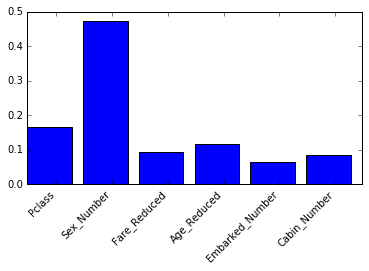

In [132]:
horizontal=[]
for x in range(0,len(features)):
    horizontal.append(x);
importance=forest.feature_importances_;

plt.figure(1)
h = plt.bar(horizontal, importance, label=features);
plt.subplots_adjust(bottom=0.3);
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h];
plt.xticks(xticks_pos, features,  ha='right', rotation=45);

In [125]:
test_data=SA_testReduced.values

In [126]:
titanic_predictions=forest.predict(test_data)

In [136]:
IDs=SA_test['PassengerId']

In [137]:
Titanic=np.c_[IDs,titanic_predictions]

In [139]:
np.savetxt("titanic_predictions.csv", Titanic, delimiter=",")
#Success rate: .75

In [140]:
#We can also now move onto other ways to predict. Let's try logistic regression:

In [322]:
#To do that, first we need to change out inputs into long vectors:
Ypart=train_data[:,0]
Xpart=train_data[:,1:]

In [144]:
np.transpose(Xpart)

array([[3, 1, 3, ..., 3, 1, 3],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 2, 0, ..., 1, 1, 0],
       [3, 3, 3, ..., 3, 3, 3],
       [0, 1, 0, ..., 0, 1, 2],
       [0, 1, 0, ..., 0, 1, 0]], dtype=int64)

In [162]:
Features=SA_trainReduced.iloc[:,1:].columns.values

In [167]:
#First we find out how large of a vector each passanager will be:
y=0;
for x in range(0,len(Features)):
    y=y+len(SA_trainReduced[Features[x]].unique())
print (y)

18


In [274]:
len(Xvector)

891

In [313]:
#Now make an array for each feature
Xs=[];
for z in range(0,len(Features)):
    Xvector=np.zeros((len(SA_trainReduced),len(SA_trainReduced[Features[z]].unique())))
    #print(   Xvector[0]  )
    subFeatures=np.sort(SA_trainReduced[Features[z]].unique())
    #print( subFeatures)
    subFeatureDic={};
    for x in range(0,len(subFeatures)):
        subFeatureDic[subFeatures[x]]=[x]
    #print ( subFeatureDic)
    y=0;
    for xx in range(0,len(Xvector)):
        Xvector[xx,subFeatureDic[SA_trainReduced[Features[z]][xx]][0]]=1
    #print (Xvector[0:5])
    Xs.append(Xvector)

In [321]:
FeatureVectors=Xs[0];
for x in range(1,len(Features)):
    FeatureVectors=np.c_[FeatureVectors,Xs[x]]

In [327]:
Y=np.zeros((len(SA_train),2))

In [329]:
for x in range(0,len(Y)):
    Y[x,Ypart[x]]=1

In [330]:
Y

array([[ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]])

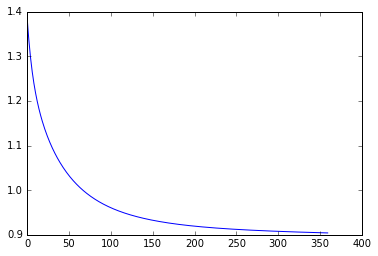

In [360]:
Xtest=FeatureVectors;
Ytest=Y;
Costfunctions=[];
Thetatest=np.asmatrix(np.random.rand(Xtest[0].size,Ytest[0].size)/100.)
m=len(Xtest);
#m=10;
for k in range(0,3000):
    z2=Xtest[0:m]*Thetatest
    a2=1./(1.+np.exp(-z2));
    J=-1./m*(np.sum(np.multiply(Ytest[0:m],np.log(a2))+np.multiply(1-Ytest[0:m],np.log(1-a2))))
    alpha=.1;
    Thetatest=Thetatest-alpha/m*(((a2-Ytest[0:m]).transpose()*Xtest[0:m]).transpose())
    Costfunctions.append(J);
    try:
        if (Costfunctions[-2]-Costfunctions[-1])<.00005:
            break
    except:
        pass
plt.plot(Costfunctions)
    #z2cv=Xcv[0:mcv]*Thetatest
    #a2cv=1./(1.+np.exp(-z2cv));
    #Jcv=-1./mcv*(np.sum(np.multiply(Ycv[0:mcv],np.log(a2cv))+np.multiply(1-Ycv[0:mcv],np.log(1-a2cv))))
    #PredictedScoreT=-1./m*(np.sum(np.multiply(Ytest[0:m],np.log(a2))));
    #PredictedScoreCV=-1./mcv*(np.sum(np.multiply(Ycv[0:mcv],np.log(a2cv))));
    #return Thetatest,a2, Costfunctions, a2cv, Jcv,PredictedScoreT,PredictedScoreCV

In [363]:
test=1./(1.+np.exp(-FeatureVectors*Thetatest))

In [367]:
test[0].max()

0.91224228419554887

In [368]:
test=a2==np.max(a2,axis=1);
test2=test.astype(int);

In [369]:
test2

matrix([[1, 0],
        [0, 1],
        [1, 0],
        ..., 
        [0, 1],
        [1, 0],
        [1, 0]])

In [374]:
solutions=np.zeros((len(test),1))

In [379]:
for x in range(0,len(test2)):
    if test2[x,1]==1:
        solutions[x]=1

In [381]:
LogisticPredictions=solutions

In [382]:
LogisticPredictions[0]

array([ 0.])

In [387]:
y=0
for x in range(0,len(Ypart)):
    if Ypart[x]==LogisticPredictions[x]:
        y=y+1
print (y/len(Ypart))

0.7957351290684624
